In [356]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [556]:
class Series(list):
    def __init__(self, values=[]):
        super().__init__()
        self.extend(v)
    
    def __ge__(self, other):
        res = Series()
        for e in self:
            res.append(e >= other)
        return res

    #def __repr__(self):
    #return list.__repr__(self)

In [557]:
class DataFrame:
    @staticmethod
    def read_csv(filename):
        df = DataFrame()
        with open(filename) as csvfile:
            heart = csv.reader(csvfile, delimiter=',')

            df.columns = next(heart)
            ncols = len(header)

            df.data = [Series() for _ in range(ncols)]
            for row in heart:
                print(row)
                for i in range(ncols):
                    val = int(row[i])
                    df.data[i].append(val)
        return df

    def __init__(self, data=None, columns=None):
        self.columns = []
        self.data = []
        if columns is not None:
            self.columns = columns
            self.data = [Series() for _ in columns]
        if data is not None:
            self.data = data
    
    def __getitem__(self, key):
        if type(key) is str:
            # якщо key це str, то повернути колонку
            try:
                i = self.columns.index(key)
                return self.data[i]
            except ValueError:
                raise KeyError(f'No column {key}')

        elif hasattr(key, '__iter__'):
            # якщо key це iterable and not str, то фільтрувати
            res = DataFrame(columns=self.columns)
            for i in range(len(key)):
                if key[i]:
                    for j in range(len(res.columns)):
                        res[j].append(self.data[j][i])
            return res
        else:
            raise KeyError(f'Cannot index by {key}')
        
    
    def __setitem__(self, col, data):
        try:
            i = self.columns.index(col)
            self.data[i] = data
        except ValueError:   
            # створити нову
            self.columns.append(col)
            self.data.append(data)
            


In [558]:
df = DataFrame.read_csv("./Ajax/heart.csv")

['63', '1', '3', '145', '233', '1', '0', '150']
['37', '1', '2', '130', '250', '0', '1', '187']
['41', '0', '1', '130', '204', '0', '0', '172']
['56', '1', '1', '120', '236', '0', '1', '178']
['57', '0', '0', '120', '354', '0', '1', '163']
['57', '1', '0', '140', '192', '0', '1', '148']
['56', '0', '1', '140', '294', '0', '0', '153']
['44', '1', '1', '120', '263', '0', '1', '173']
['52', '1', '2', '172', '199', '1', '1', '162']
['57', '1', '2', '150', '168', '0', '1', '174']
['54', '1', '0', '140', '239', '0', '1', '160']
['48', '0', '2', '130', '275', '0', '1', '139']
['49', '1', '1', '130', '266', '0', '1', '171']
['64', '1', '3', '110', '211', '0', '0', '144']
['58', '0', '3', '150', '283', '1', '0', '162']
['50', '0', '2', '120', '219', '0', '1', '158']
['58', '0', '2', '120', '340', '0', '1', '172']
['66', '0', '3', '150', '226', '0', '1', '114']
['43', '1', '0', '150', '247', '0', '1', '171']
['69', '0', '3', '140', '239', '0', '1', '151']
['59', '1', '0', '135', '234', '0', '1',

In [559]:
df.columns

['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh']

In [560]:
df.data[0]

['5',
 '7',
 ',',
 '0',
 ',',
 '1',
 ',',
 '1',
 '3',
 '0',
 ',',
 '2',
 '3',
 '6',
 ',',
 '0',
 ',',
 '0',
 ',',
 '1',
 '7',
 '4',
 63,
 37,
 41,
 56,
 57,
 57,
 56,
 44,
 52,
 57,
 54,
 48,
 49,
 64,
 58,
 50,
 58,
 66,
 43,
 69,
 59,
 44,
 42,
 61,
 40,
 71,
 59,
 51,
 65,
 53,
 41,
 65,
 44,
 54,
 51,
 46,
 54,
 54,
 65,
 65,
 51,
 48,
 45,
 53,
 39,
 52,
 44,
 47,
 53,
 53,
 51,
 66,
 62,
 44,
 63,
 52,
 48,
 45,
 34,
 57,
 71,
 54,
 52,
 41,
 58,
 35,
 51,
 45,
 44,
 62,
 54,
 51,
 29,
 51,
 43,
 55,
 51,
 59,
 52,
 58,
 41,
 45,
 60,
 52,
 42,
 67,
 68,
 46,
 54,
 58,
 48,
 57,
 52,
 54,
 45,
 53,
 62,
 52,
 43,
 53,
 42,
 59,
 63,
 42,
 50,
 68,
 69,
 45,
 50,
 50,
 64,
 57,
 64,
 43,
 55,
 37,
 41,
 56,
 46,
 46,
 64,
 59,
 41,
 54,
 39,
 34,
 47,
 67,
 52,
 74,
 54,
 49,
 42,
 41,
 41,
 49,
 60,
 62,
 57,
 64,
 51,
 43,
 42,
 67,
 76,
 70,
 44,
 60,
 44,
 42,
 66,
 71,
 64,
 66,
 39,
 58,
 47,
 35,
 58,
 56,
 56,
 55,
 41,
 38,
 38,
 67,
 67,
 62,
 63,
 53,
 56,
 48,
 58,
 58

In [555]:
df['trtbps'] >= 140

TypeError: '>=' not supported between instances of 'str' and 'int'

In [483]:
df_pd = pd.read_csv("./Ajax/heart.csv")

In [484]:
df_pd['age']

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64

In [485]:
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trtbps    303 non-null    int64
 4   chol      303 non-null    int64
 5   fbs       303 non-null    int64
 6   restecg   303 non-null    int64
 7   thalachh  303 non-null    int64
dtypes: int64(8)
memory usage: 19.1 KB


In [486]:
df1 = df_pd[df_pd['trtbps'] >= 140]

In [487]:
df1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh
0,63,1,3,145,233,1,0,150
5,57,1,0,140,192,0,1,148
6,56,0,1,140,294,0,0,153
8,52,1,2,172,199,1,1,162
9,57,1,2,150,168,0,1,174


If age >= 0 & age < 2 then AgeGroup = Infant

If age >= 2 & age < 4 then AgeGroup = Toddler

If age >= 4 & age < 13 then AgeGroup = Kid

If age >= 13 & age < 20 then AgeGroup = Teen


bins= [-1,0,2,4,13,20, 110]

labels = ['unknown','Infant','Toddler','Kid','Teen', 'Adult']

X_train_data['AgeGroup'] = pd.cut(X_train_data['Age'], bins=bins, labels=labels, right=False)

In [60]:
bins = [25, 35, 45, 55, 65, 75, 84]
labels = ['25-34', '35-44', '45-54', '55-64', '65-74', '75-84']

df1['age_group'] = pd.cut(df1['age'], bins=bins, labels=labels, right=False)

/home/qgelena/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


<BarContainer object of 6 artists>

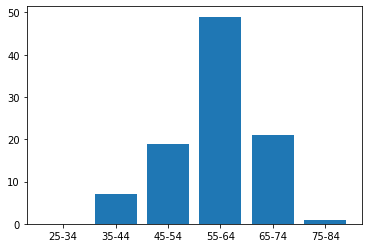

In [17]:
g1 = df1.groupby(["age_group"]).size().reset_index(name='count')

y= g1['count']
x=g1['age_group']

plt.bar(x, y)

In [72]:
#df1.groupby('age_group', as_index=False)['thalachh'].mean()
g1 = df1.groupby('age_group')['thalachh'].mean().reset_index(name='mean_thalachh')

In [73]:
g1

,age_group,mean_thalachh
0,25-34,NaN
1,35-44,178.285714
2,45-54,152.789474
3,55-64,144.714286
4,65-74,140.476190
5,75-84,116.000000


<BarContainer object of 6 artists>

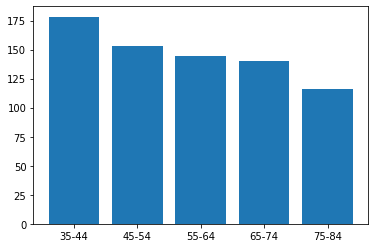

In [99]:
y= g1['mean_thalachh']
x=g1['age_group']

plt.bar(x, y)

In [20]:
df1[df1["age_group"] == '25-34']

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,age_group
